In [1]:
#for relative open masslib
import sys
sys.path.append('..')
import warnings
warnings.filterwarnings('ignore')

In [2]:
from nhsmasslib.mass import MassSpectrum
from nhsmasslib.mass import VanKrevelen
from nhsmasslib.mass import Tmds
from nhsmasslib.brutto import brutto_gen

#### Load spectrum

Assign with minimal error - 0.25 for more reliable results

Show initial vk

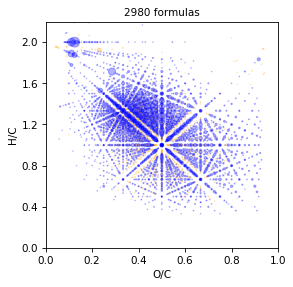

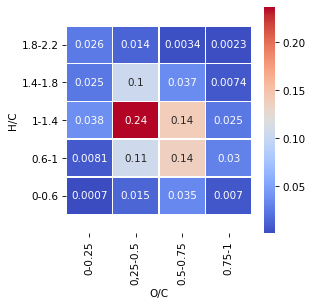

In [3]:
spec = MassSpectrum().load('data/sample3.txt', mapper={'mass':'mass','intensity':'intensity'}, sep=',', take_columns=['mass','intensity'])
gdf = brutto_gen(elems={'C':(1,40),'H':(0,80), 'O':(0,40),'N':(0,2)})
spec = spec.assign(generated_bruttos_table=gdf, rel_error=0.25)
vk = VanKrevelen(spec.table).draw_scatter(nitrogen=True)
vk = VanKrevelen(spec.table).squares()

#### Caclculate Total mass difference statistic (TMDS)

In [4]:
tmds_spec = Tmds().calc(spec, p=0.2) #by varifiy p-value we can choose how much mass-diff we will take
tmds_spec = tmds_spec.assign(gdf={'C':(-1,20),'H':(-4,40), 'O':(-1,20),'N':(0,1)})
tmds_spec = tmds_spec.calculate_mass()
tmds_spec.table

,C,H,O,N,assign,mass_dif,probability,count,calculated_mass
0,1,4,-1,0,True,0.036,1.264341,888.0,0.036385
1,0,2,0,0,True,2.016,2.827907,953.0,2.015650
2,-1,0,1,0,True,3.995,2.691473,847.0,3.994915
3,1,8,-1,0,True,4.068,1.674419,635.0,4.067685
4,-1,2,1,0,True,6.011,2.021705,716.0,6.010565
...,...,...,...,...,...,...,...,...,...
322,13,14,7,0,True,282.074,0.504651,171.0,282.073955
323,12,12,8,0,True,284.053,0.330233,152.0,284.053220
324,13,18,7,0,True,286.105,0.467442,137.0,286.105255
325,14,14,7,0,True,294.074,0.395349,141.0,294.073955


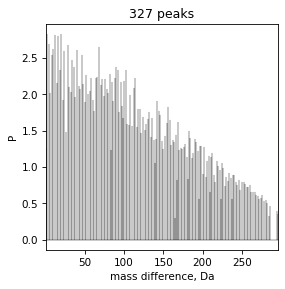

In [5]:
tmds_spec.draw()

#### Assigne by TMDS. It is takes a lot of times

In [6]:
spec = spec.assign_by_tmds(tmds_spec)
#show percent of process complete

100%|██████████| 327/327 [03:19<00:00,  1.64it/s]


#### Look result

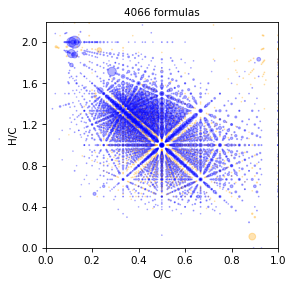

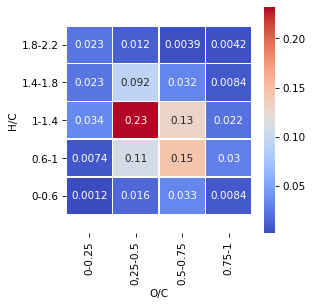

In [7]:
vk = VanKrevelen(spec.table).draw_scatter(nitrogen=True)
vk = VanKrevelen(spec.table).squares()

#### Without TMDS and rel_error 0.5 ppm

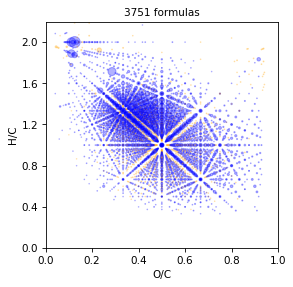

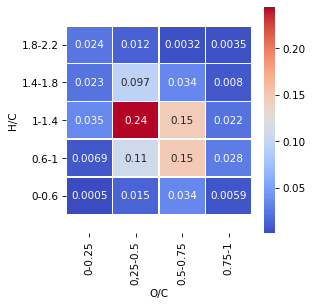

In [8]:
spec2 = MassSpectrum().load('data/sample3.txt', mapper={'mass':'mass','intensity':'intensity'}, sep=',', take_columns=['mass','intensity'])
gdf = brutto_gen(elems={'C':(1,40),'H':(0,80), 'O':(0,40),'N':(0,3)})
spec2 = spec2.assign(generated_bruttos_table=gdf, rel_error=0.5)
vk = VanKrevelen(spec2.table).draw_scatter(nitrogen=True)
vk = VanKrevelen(spec2.table).squares()

#### Short take tmds

take 100 diff-masses from tmds

If you want to fast you treatment or restrict tmds by number you can restrict it. But for best result it is better to use 400-500 mass-diffrences from tmds.

100%|██████████| 101/101 [01:02<00:00,  1.61it/s]


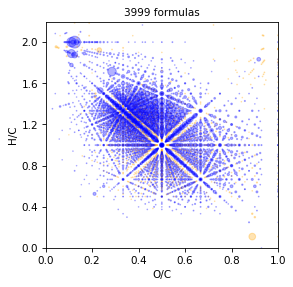

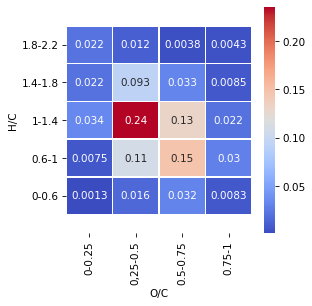

In [9]:
spec = MassSpectrum().load('data/sample3.txt', mapper={'mass':'mass','intensity':'intensity'}, sep=',', take_columns=['mass','intensity'])
gdf = brutto_gen(elems={'C':(1,40),'H':(0,80), 'O':(0,40),'N':(0,2)})
spec = spec.assign(generated_bruttos_table=gdf, rel_error=0.25)

spec = spec.assign_by_tmds(max_num=100)

vk = VanKrevelen(spec.table).draw_scatter(nitrogen=True)
vk = VanKrevelen(spec.table).squares()

#### Short take tmds

take tmds with p-value = 0.7

Some times with default p-value = 0.2 tmds spectrum will be too big, so its reasonobly restrict it by p-value.

100%|██████████| 122/122 [01:15<00:00,  1.63it/s]


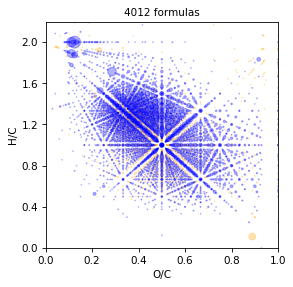

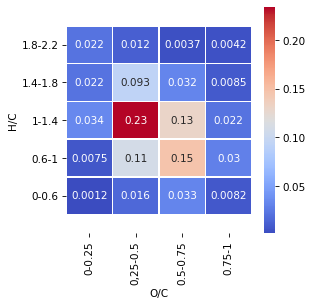

In [10]:
spec = MassSpectrum().load('data/sample3.txt', mapper={'mass':'mass','intensity':'intensity'}, sep=',', take_columns=['mass','intensity'])
gdf = brutto_gen(elems={'C':(1,40),'H':(0,80), 'O':(0,40),'N':(0,2)})
spec = spec.assign(generated_bruttos_table=gdf, rel_error=0.25)

spec = spec.assign_by_tmds(p=0.7)

vk = VanKrevelen(spec.table).draw_scatter(nitrogen=True)
vk = VanKrevelen(spec.table).squares()

#### Short take tmds

take tmds with p-value = 1.0 but without verification by C13_peaks

Actually it is better use C13 validation, but when you spectrum consist only 500-1000 reliable ions, it may be good desicion because tmds may be toot small.

100%|██████████| 67/67 [00:41<00:00,  1.61it/s]


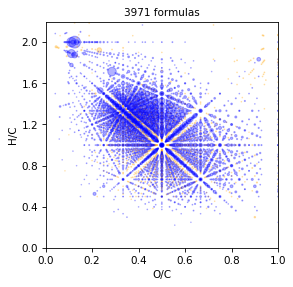

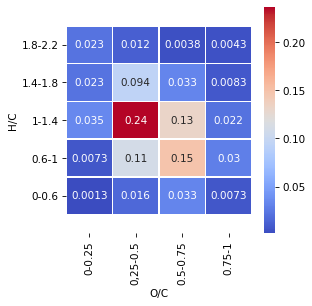

In [11]:
spec = MassSpectrum().load('data/sample3.txt', mapper={'mass':'mass','intensity':'intensity'}, sep=',', take_columns=['mass','intensity'])
gdf = brutto_gen(elems={'C':(1,40),'H':(0,80), 'O':(0,40),'N':(0,2)})
spec = spec.assign(generated_bruttos_table=gdf, rel_error=0.25)

spec = spec.assign_by_tmds(p=1.0, C13_filter=False)

vk = VanKrevelen(spec.table).draw_scatter(nitrogen=True)
vk = VanKrevelen(spec.table).squares()